## Module_2: *Lung Fibrosis*

## Team Members:
*Molly Kessenich, Lakshya Raman*

## Project Title:
*Predicting Lung Fibrosis at Biopsy Depths*



## Project Goal:
This project aims to investigate the variation in fibrosis extent throughout the depth of a fibrotic lung and use interpolation to predict the amount of fibrosis at a specific depth into the lung. The goal is to develop an image analysis pipeline that predicts the extent of fibrosis in the lung at various biopsy depths from the top of the lung to create a lung biopsy device.*

## Disease Background: 
* Prevalence & incidence
    * Prevalence: 
        * Idiopathic Pulmonary Fibrosis (IPF) prevalence is higher in older individuals.
        * US estimates of prevalence = around 14 to 42.7 per 100,000 people.
        *  Prevalence is rising globally - some regions show higher rates 
            * North America (24.0-29.8 per 100,000) 
            * South Korea (4.51 per 10,000 or 45.1 per 100,000).
    * Incidence: 
        * US estimates of annual incidence of IPF = between 6.8 and 16.3 per 100,000 people.
        * IPF incidence is increasing globally.
* Risk factors (genetic, lifestyle)
    * Genetic:
        * Family history of pulmonary fibrosis (PF) or interstitial lung diseases (ILDs)
        * MUC5B Gene = a specific genetic variant (rs35705950) in this gene is a risk factor linked to both familial and idiopathic PF
        * Mutations in genes that maintain telomeres (e.g., TERT, TERC, PARN, and RTEL1) can lead to the shortening of telomeres and increase the risk.
    * Lifestyle:
        * Smoking
        * Occupational dusts (metal, wood, silica, agricultural)
        * Air pollution 
        * Inhaling substances such as environmental irritants like mold spores, bacteria, or animal proteins

* Symptoms
    * Lung scarring leads to difficulty breathing and shortness of breath
    * Dry, persistent hacking/barking cough: over the counter drugs do not help
    * Fatigue
    * Chest pain
    * Thickening/rounding of the fingertips or toes or clubbing. 
    * Weight loss due to difficulty breathing and decreased appetite. 
    * Cyanosis (a blueish tint to the skin/lips): the lungs cannot adequately oxygenate the blood. 
    * Joint pain and muscle weakness

* Standard of care treatment(s)
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)

## Data-Set: 
*(Describe the data set(s) you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*
* The dataset consists of 78 black and white images (.jpg) collected at various depths within a fibrotic mouse lung. White in the images indicates a fibrotic lesion, whereas black indicates healthy lung tissue. The images were collected from mice lungs (sliced and immunostained for desmin signal) with a Bleomycin-induced Lung Injury Model.


## Data Analyis: 
* We chose 6 images from the data set at varying depths (2 from lower depths, 2 from the middle range, and 2 at higher depths) to compare the extent of lung fibrosis at different tissue depths
* The code below extrapolates the depths of each 6 images, calculates the percentage (%) of white pixels (representing the extent of lung fibrosis, higher % = more fibrosis), and plots these extrapolated points in a plot of % white pixels vs. the depths for each image
* The code also then prompts the user to input a depth value, and using the input depth value using linear interpolation the point is plotted on a graph in red.
* We then used a linear regression on our data points to determine a line of best fit and calculate an R-squared value and slope to verify the relationship between lung fibrosis extent and depth of the tissue

Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 37799
Black pixels in image 1: 4156505

White pixels in image 2: 383479
Black pixels in image 2: 3810825

White pixels in image 3: 151132
Black pixels in image 3: 4043172

White pixels in image 4: 59426
Black pixels in image 4: 4134878

White pixels in image 5: 81014
Black pixels in image 5: 4113290

Percent white px:
/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_Sk658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_Sk658 Llobe ch010030.jpg:
0.9011983871459961% White | Depth: 200 microns

/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_SK658 Slobe ch010098.jpg:
9.142851829528809% White | Depth: 10000 microns

/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_SK658 Slobe ch010115.jpg:
3.6032676696777344% White | Depth: 8800 microns

/Users/mollykessenich/Desktop/BME 2315/mod

Enter the depth at which you want to interpolate a point:  4000


The interpolated point is at the x-coordinate 4000.0 and y-coordinate 2.1954837598298726.


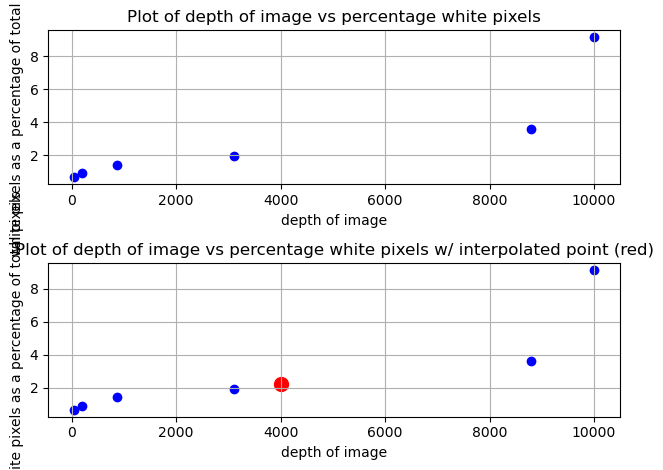

Linear Regression Verification
Equation: y = 0.0006x +  0.5226
R² value: 0.7686


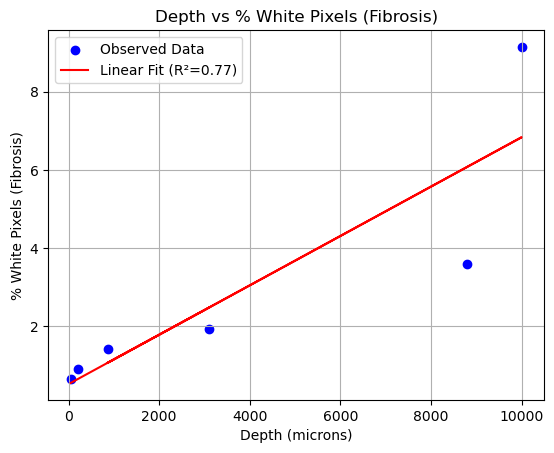

Interpretation: The regression slope is 0.0006, indicating that fibrosis (% white pixels) increases with depth.


In [15]:
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''
from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_Sk658 Llobe ch010017.jpg",
    r"/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_Sk658 Llobe ch010030.jpg",
    r"/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_SK658 Slobe ch010098.jpg",
    r"/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_SK658 Slobe ch010115.jpg",
    r"/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_SK658 Slobe ch010159.jpg",
    r"/Users/mollykessenich/Desktop/BME 2315/module 2/MASK_Sk658 Llobe ch010174.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    45,
    200,
    10000,
    8800,
    860,
    3100
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''

# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

'''Module 2 Verification and Validation: Linear Regression Analysis'''

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Convert lists to numpy arrays and reshape for sklearn
x = np.array(depths).reshape(-1, 1)
y = np.array(white_percents)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values based on the fitted line
y_pred = model.predict(x)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

# Print regression equation and R-squares
print(colored("Linear Regression Verification", "yellow"))
print(f"Equation: y = {model.coef_[0]:.4f}x + {model.intercept_: .4f}")
print(f"R² value: {r2:.4f}")

# Plot the data with regression line
plt.figure()
plt.scatter(x, y, color='blue', label='Observed Data')
plt.plot(x, y_pred, color='red', label=f'Linear Fit (R²={r2:.2f})')
plt.title('Depth vs % White Pixels (Fibrosis)')
plt.xlabel('Depth (microns)')
plt.ylabel('% White Pixels (Fibrosis)')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation section
if model.coef_[0] > 0:
    trend = "increases"
else:
    trend = "decreases"

print(colored(f"Interpretation: The regression slope is {model.coef_[0]:.4f}, indicating that fibrosis (% white pixels) {trend} with depth.", "green"))



## Verify and validate your analysis: 
* Verification: 
    * To verify that our analysis produced interpretable results and that our data were sensible, we examined both the raw data and the linear regression relationship between tissue depth (µm) and fibrosis extent (% white pixels). 
    * We also ensured that we used multiple images from different depths and sections in the lung (not all from the same area), which showed a consistent increasing trend, confirming that a single outlier did not drive the relationship.
    * The regression analysis yielded a positive slope of 0.0006 and an R-squared value of 0.77, indicating a strong linear relationship between depth and fibrosis. 
    * Therefore, this verifies that as tissue depth increases, the percentage of white pixels (representing collagen-dense fibrotic tissue) also increases.
    * This trend is biologically plausible, as in fibrotic lungs, deeper regions tend to experience lower ventilation and higher mechanical strain, which promotes extracellular matrix deposition and collagen accumulation. 
    * The high R^2 value (close to 1) suggests that depth is related to the extent of fibrosis, and the extent increases linearly with depth.
* Validation: 
    * To validate our findings, we compared our fibrosis trend (dependent on depth) to evidence from published literature on the distribution of lung fibrosis.
    Several studies describes an accumulation of fibrosis in deeper lung regions which is consistent with our observations
    Barratt et al., American Journal of Respiratory and Critical Care Medicine, 2018
    * This study found that in idiopathic pulmonary fibrosis (IPF), fibrotic lesions begin in the subpleural and basal regions (edges of the lungs) and they then spread towards the lung interior (progression of the disease)
    * This pattern suggests that fibrosis tends to be more severe in deeper tissue layers, which aligns with our analysis, which found that the percentage of white pixels (representing fibrotic tissue) increased with increasing tissue depth.


* Overall, our analysis reveals that the extent of fibrosis increases with tissue depth, as confirmed by a statistically significant linear regression (R^2= 0.77) and supported by consistent findings in a relevant study. This suggests that our image-processing pipeline effectively reflects the biological trend of variation in fibrosis distribution within the lung.


## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

10/02/25- Began gathering background research, set upcode to extract and graph pixel percentages by depth for 6 images.
10/07/25- Went over matrices and calculating regression with numpy, finished majority of background research. 
10/07/25-10/15/25- Adjusted the code to broaden the depth range of the 6 images analyzed, verfied data using linear regression, drew conclusions from data. 

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*
[UNANSWERED] We were just curious about the real world applications of this juputer notebook, what are the research implications of knowing the pixel count by depths of lung fibrosis?